In [ ]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown

from src.load_data import DataLoaderFactory
from src.plot_data_basic import Plotter, PlotStrategy
from src.plot_data_basic import PlotAverageSessionTimes, PlotNumberOfSessions, PlotUserFrequencyDistribution
from src.plot_data_univariate import PlotCategoricalDistribution, PlotNumericalDistribution
from src.plot_data_bivariate import PlotNumericalVsNumericalScatter, PlotCorrHeatmap, PlotCategoricalVsNumericalBox

from src.eda_tools import plot_bivariate_plots, plot_univariate_plots
from src.plot_tools import add_enriched_datetime_columns, get_daily_session_stats
from src.utils import setup_logger

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

plotter = Plotter(PlotStrategy)

dataset_id = "ASR"

setup_logger(os.path.join("log",f"{dataset_id.lower()}.log"), level="INFO")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Load the data
loader = DataLoaderFactory.get_loader(
        dataset_id,
        force_download=False
    )
df_raw: pd.DataFrame = loader.load()
df_original = add_enriched_datetime_columns(df_raw)
display(df_original.head(5))
display(df_original.tail(5))

print("\nData Types and Non-null Counts:")
print(df_original.info())


2025-07-31 16:36:05,778 | INFO | src.load_data | The dataset 'ASR' already exists in 'c:\Users\OzceylanB\OneDrive\Projects\ev-charge-eda\data\formatted' and will not be re-downloaded.


,EV_id_x,start_datetime,end_datetime,total_energy,month,day_of_week,day_of_week_enum,duration_minutes,date,start_time,end_time
0,EV0,2020-08-25 11:56:02,2020-08-25 12:08:15,1.477,August,Tuesday,1,12.216667,2020-08-25,11:56:02,12:08:15
1,EV0,2020-08-25 12:20:30,2020-08-25 12:32:16,1.333,August,Tuesday,1,11.766667,2020-08-25,12:20:30,12:32:16
2,EV0,2020-08-25 12:40:47,2020-08-25 13:01:23,2.330,August,Tuesday,1,20.600000,2020-08-25,12:40:47,13:01:23
3,EV0,2020-08-25 13:05:31,2020-08-25 13:37:29,3.764,August,Tuesday,1,31.966667,2020-08-25,13:05:31,13:37:29
4,EV0,2020-08-25 14:03:28,2020-08-25 14:23:03,2.297,August,Tuesday,1,19.583333,2020-08-25,14:03:28,14:23:03


,EV_id_x,start_datetime,end_datetime,total_energy,month,day_of_week,day_of_week_enum,duration_minutes,date,start_time,end_time
55374,EV1031,2024-10-02 12:37:13,2024-10-02 16:04:30,13.560,October,Wednesday,2,207.283333,2024-10-02,12:37:13,16:04:30
55375,EV3270,2024-10-02 12:42:09,2024-10-02 15:15:24,23.780,October,Wednesday,2,153.250000,2024-10-02,12:42:09,15:15:24
55376,EV3381,2024-10-02 12:42:24,2024-10-02 16:01:20,14.190,October,Wednesday,2,198.933333,2024-10-02,12:42:24,16:01:20
55377,EV2890,2024-10-02 12:50:40,2024-10-02 13:01:57,1.962,October,Wednesday,2,11.283333,2024-10-02,12:50:40,13:01:57
55378,EV3001,2024-10-02 13:26:42,2024-10-02 14:49:59,8.260,October,Wednesday,2,83.283333,2024-10-02,13:26:42,14:49:59



Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55379 entries, 0 to 55378
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EV_id_x           55379 non-null  object        
 1   start_datetime    55379 non-null  datetime64[ns]
 2   end_datetime      55379 non-null  datetime64[ns]
 3   total_energy      55379 non-null  float64       
 4   month             55379 non-null  object        
 5   day_of_week       55379 non-null  object        
 6   day_of_week_enum  55379 non-null  int32         
 7   duration_minutes  55379 non-null  float64       
 8   date              55379 non-null  object        
 9   start_time        55379 non-null  object        
 10  end_time          55379 non-null  object        
dtypes: datetime64[ns](2), float64(2), int32(1), object(6)
memory usage: 4.4+ MB
None


In [25]:
# Load the data
loader = DataLoaderFactory.get_loader(
        dataset_id,
        force_download=False
    )
df_raw: pd.DataFrame = loader.load()
df = add_enriched_datetime_columns(df_raw)
display(df)
print("\nData Types and Non-null Counts:")
print(df.info())

2025-07-31 16:36:06,110 | INFO | src.load_data | The dataset 'ASR' already exists in 'c:\Users\OzceylanB\OneDrive\Projects\ev-charge-eda\data\formatted' and will not be re-downloaded.


,EV_id_x,start_datetime,end_datetime,total_energy,month,day_of_week,day_of_week_enum,duration_minutes,date,start_time,end_time
0,EV0,2020-08-25 11:56:02,2020-08-25 12:08:15,1.477,August,Tuesday,1,12.216667,2020-08-25,11:56:02,12:08:15
1,EV0,2020-08-25 12:20:30,2020-08-25 12:32:16,1.333,August,Tuesday,1,11.766667,2020-08-25,12:20:30,12:32:16
2,EV0,2020-08-25 12:40:47,2020-08-25 13:01:23,2.330,August,Tuesday,1,20.600000,2020-08-25,12:40:47,13:01:23
3,EV0,2020-08-25 13:05:31,2020-08-25 13:37:29,3.764,August,Tuesday,1,31.966667,2020-08-25,13:05:31,13:37:29
4,EV0,2020-08-25 14:03:28,2020-08-25 14:23:03,2.297,August,Tuesday,1,19.583333,2020-08-25,14:03:28,14:23:03
...,...,...,...,...,...,...,...,...,...,...,...
55374,EV1031,2024-10-02 12:37:13,2024-10-02 16:04:30,13.560,October,Wednesday,2,207.283333,2024-10-02,12:37:13,16:04:30
55375,EV3270,2024-10-02 12:42:09,2024-10-02 15:15:24,23.780,October,Wednesday,2,153.250000,2024-10-02,12:42:09,15:15:24
55376,EV3381,2024-10-02 12:42:24,2024-10-02 16:01:20,14.190,October,Wednesday,2,198.933333,2024-10-02,12:42:24,16:01:20
55377,EV2890,2024-10-02 12:50:40,2024-10-02 13:01:57,1.962,October,Wednesday,2,11.283333,2024-10-02,12:50:40,13:01:57



Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55379 entries, 0 to 55378
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EV_id_x           55379 non-null  object        
 1   start_datetime    55379 non-null  datetime64[ns]
 2   end_datetime      55379 non-null  datetime64[ns]
 3   total_energy      55379 non-null  float64       
 4   month             55379 non-null  object        
 5   day_of_week       55379 non-null  object        
 6   day_of_week_enum  55379 non-null  int32         
 7   duration_minutes  55379 non-null  float64       
 8   date              55379 non-null  object        
 9   start_time        55379 non-null  object        
 10  end_time          55379 non-null  object        
dtypes: datetime64[ns](2), float64(2), int32(1), object(6)
memory usage: 4.4+ MB
None


### EV Arrival Patterns

**Number of EV Arrivals per Month**  
   This bar chart displays the monthly counts of EV arrivals across the original dataset.  
   - EV arrivals start at **low levels in late 2020**, but the system was **not fully functional until early 2022**, which explains the very low counts during the initial period.  
   - From **2022 onward**, arrivals increase steadily, reflecting the growing adoption and expansion of the EV charging infrastructure.  
   - A notable **growth trend** is observed during **2023 and early 2024**, where arrivals frequently exceed **2,000 sessions per month**, peaking at around **2,500 sessions**.  
   

This view provides a clear timeline of charging activity, illustrating both the adoption curve of the charging infrastructure and periods of high utilization.


2025-07-31 16:36:06,393 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 16:36:06,397 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


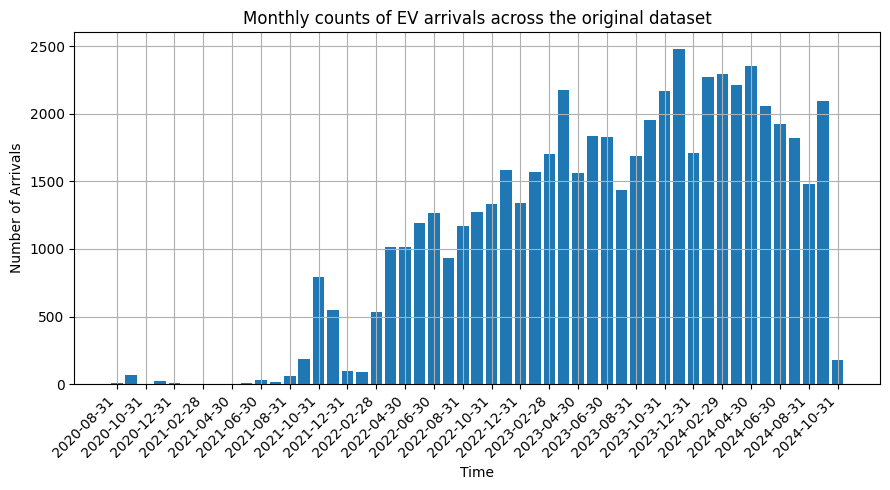

In [26]:
fig, ax = plt.subplots(figsize=(9, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_original, ax=ax)
ax.set_title("Monthly counts of EV arrivals across the original dataset")
plt.show()

### Data Cleaning Steps

The dataset initially contained **55,379 charging sessions**, spanning from **2020-08-25** to **2024-10-02**.

1. **Remove sessions before February 2022**  
   There are very few sessions before February 2022, all charging sessions that occurred **before February 2022** will be removed.  
   *This step removes approximately **3.5%** of the data.*

2. **Remove weekend sessions**  
   There are very few sessions on weekends, all charging sessions **on weekends** will be removed.  
   *This step removes approximately **0.1%** of the remaining sessions.*

Therefore, only consider the ones starting from **February 2022 onward** and **on a weekday** for further analysis.

After these cleaning steps, **26,496 (96.4%) sessions** remain for analysis.



In [27]:
df = df_original
total_sessions = df.shape[0]

# Count sessions before the cutoff_date (2022-02-01)
cutoff_date = pd.to_datetime("2022-02-01")
after_cutoff_date = df["start_datetime"] < cutoff_date
portion_after_cutoff_date = 100 * after_cutoff_date.sum() / total_sessions

display(Markdown(f"""
Total number of sessions: {total_sessions}.<br>
Remove the sessions occurred **before Feb 2022**-> **{after_cutoff_date.sum()} sessions**.
"""))

df_v1 = df[(df["start_datetime"] >= cutoff_date)].copy()



Total number of sessions: 55379.<br>
Remove the sessions occurred **before Feb 2022**-> **1946 sessions**.


In [28]:
df = df_v1
total_sessions = df.shape[0]

sessions_on_weekend = df["day_of_week_enum"] >= 5
portion_sessions_on_weekend = 100 * sessions_on_weekend.sum() / total_sessions

display(Markdown(f"""
Total number of remaining sessions: {total_sessions}.<br>
The number of sessions occurred **on weekends**: **{sessions_on_weekend.sum()} sessions**.
"""))

df_v2 = df[(df["day_of_week_enum"] < 5)].copy()


Total number of remaining sessions: 53433.<br>
The number of sessions occurred **on weekends**: **33 sessions**.


In [29]:
df_cleaned = df_v2
total_sessions_original = df_original.shape[0]
total_sessions_cleaned = df_cleaned.shape[0]
display(Markdown(f"""
Total number of remaining sessions: {total_sessions_cleaned} ({100*total_sessions_cleaned/total_sessions_original:.1f}%).
"""))


Total number of remaining sessions: 53400 (96.4%).


2025-07-31 16:36:06,968 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 16:36:06,972 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


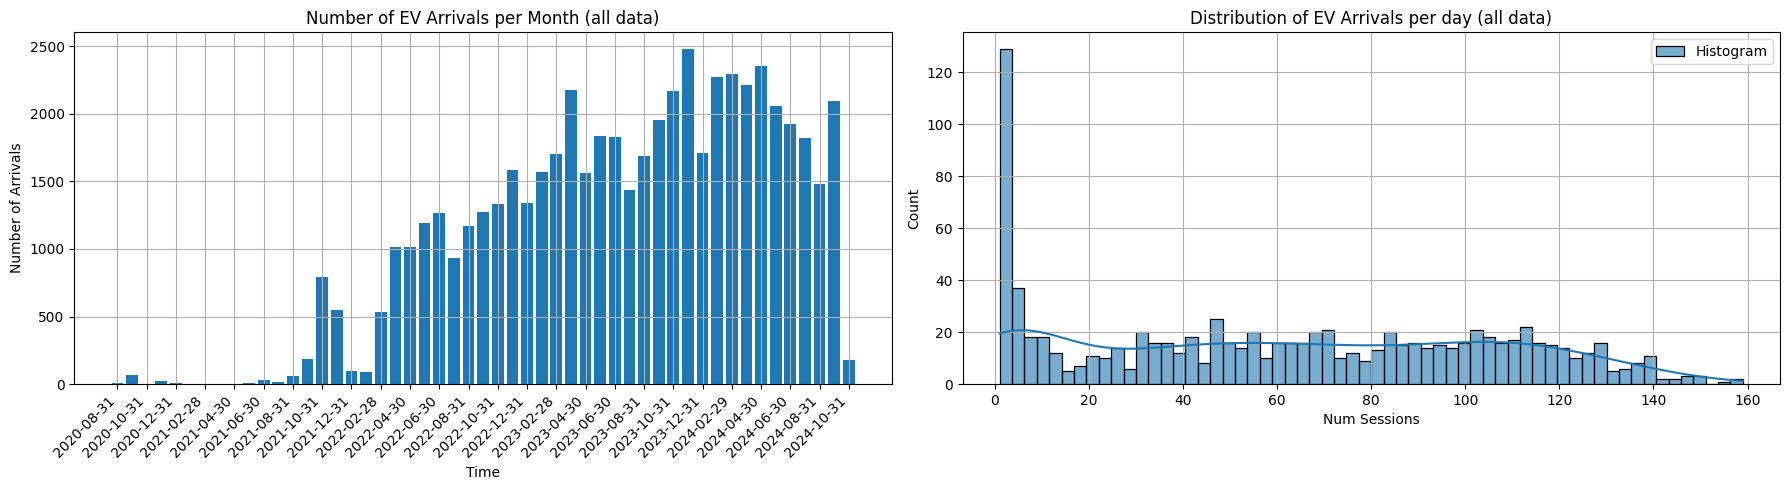

2025-07-31 16:36:07,829 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 16:36:07,834 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


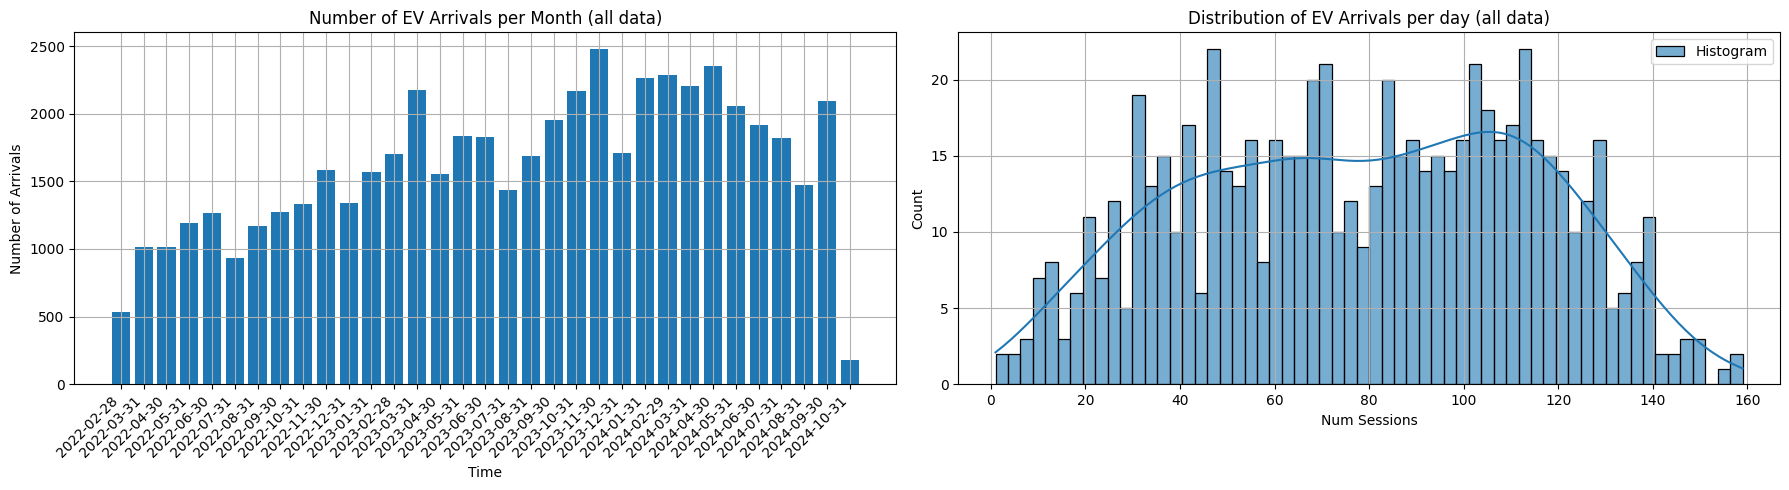

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_original, ax= axs[0])
fig.axes[0].set_title("Number of EV Arrivals per Month (all data)")

plotter.set_strategy(PlotNumericalDistribution(kde=True))
plotter.plot(get_daily_session_stats(df_original), column="num_sessions", bins=60, ax=axs[1])
fig.axes[1].set_title("Distribution of EV Arrivals per day (all data)")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_cleaned, ax= axs[0])
fig.axes[0].set_title("Number of EV Arrivals per Month (all data)")

plotter.set_strategy(PlotNumericalDistribution(kde=True))
plotter.plot(get_daily_session_stats(df_cleaned), column="num_sessions", bins=60, ax=axs[1])
fig.axes[1].set_title("Distribution of EV Arrivals per day (all data)")
plt.show()

### EV Arrival Patterns After Data Cleaning

The figure above compares the distribution of EV charging sessions **before and after applying data-cleaning steps** (removing data before February 2022 and sessions on weekends):

1. **Number of EV Arrivals per Month (left)**  
   - Monthly arrivals grow steadily from **early 2022**, reaching peaks of around **2,500 sessions per month** in 2023 and 2024.  
   - The charging network appears to stabilize with **sustained high utilization** throughout 2023–2024.  
   - The decline in the last bin reflects incomplete data for the last month.

2. **Distribution of EV Arrivals per Day (right)**  
   - The daily session counts follow a **broad distribution** between **20 and 120 sessions per day**.  

In summary, data cleaning resulted in providing a more consistent dataset for analyzing typical EV charging behaviors.


Unique users: 3374
Users with at least 20 sessions: 630 (18.7%) of the users account for 82.5% of all sessions.
Users with at least 10 sessions: 915 (27.1%) of the users account for 89.9% of all sessions.
Users with at least 5 sessions: 1221 (36.2%) of the users account for 93.7% of all sessions.
Users with at least 3 sessions: 1573 (46.6%) of the users account for 95.9% of all sessions.
Users with only one sessions: 1433 (42.5%) of the users account for 2.7% of all sessions.


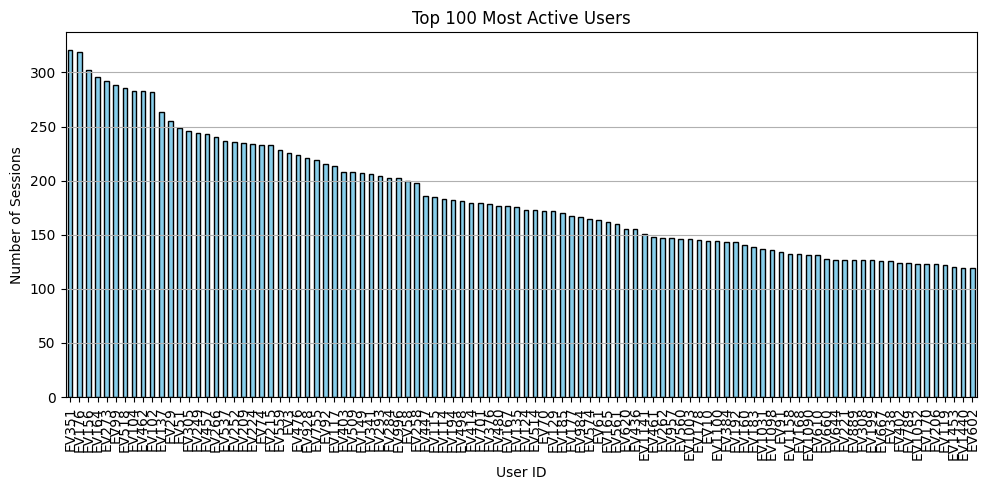

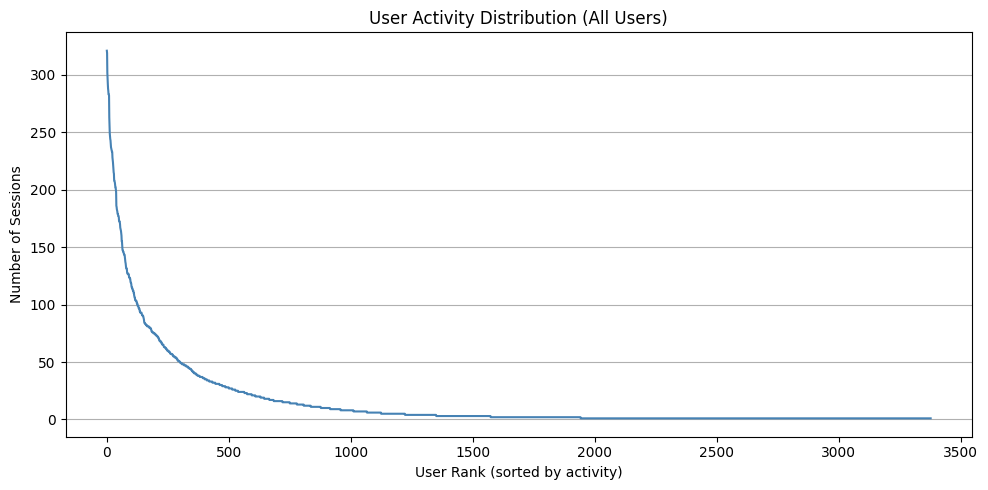

In [67]:
# Number of unique users
unique_users = df_cleaned['EV_id_x'].nunique()

# Session counts per user
sessions_per_user = df_cleaned['EV_id_x'].value_counts()

print(f"Unique users: {unique_users}")

for x in [20, 10, 5, 3]: 
    mask = sessions_per_user >= x
    more_than_x = mask.sum()
    percentage_more_than_x = (more_than_x / unique_users) * 100 
    print(f"Users with at least {x} sessions: {more_than_x} ({percentage_more_than_x:.1f}%) of the users account for {100*sessions_per_user.loc[mask].sum()/sessions_per_user.sum():.1f}% of all sessions.")

mask = sessions_per_user == 1
only_one = mask.sum()
percentage_only_one = (only_one / unique_users) * 100
print(f"Users with only one sessions: {only_one} ({percentage_only_one:.1f}%) of the users account for {100*sessions_per_user.loc[mask].sum()/sessions_per_user.sum():.1f}% of all sessions.")

plotter.set_strategy(PlotUserFrequencyDistribution())
fig, _ = plotter.plot(df_v1, top_n = 100)
fig, _ = plotter.plot(df_v1,top_n=-1)

### User Activity Distribution (All Users)

The figure above shows the distribution of **all 3,374 EV users**, ranked by their number of charging sessions:

- **18.7% of users** (≥20 sessions) account for **82.5% of sessions**.
- **27.1% of users** (≥10 sessions) account for **89.9% of sessions**.
- **42.5% of users** are one-time users, yet they contribute **only 2.7% of sessions**.

This indicates that a relatively small group of highly engaged users drives nearly all the activity. As a result, **user-level analysis in this dataset is meaningful**, since user behavior is consistent and recurring among the more engaged portion of the user base.

### Exploring Dataset Distributions

In the following sections, we present key **categorical** and **numerical** distributions related to the dataset.  
These visualizations help uncover patterns in usage behavior, session characteristics, and other important features of the EV charging data.

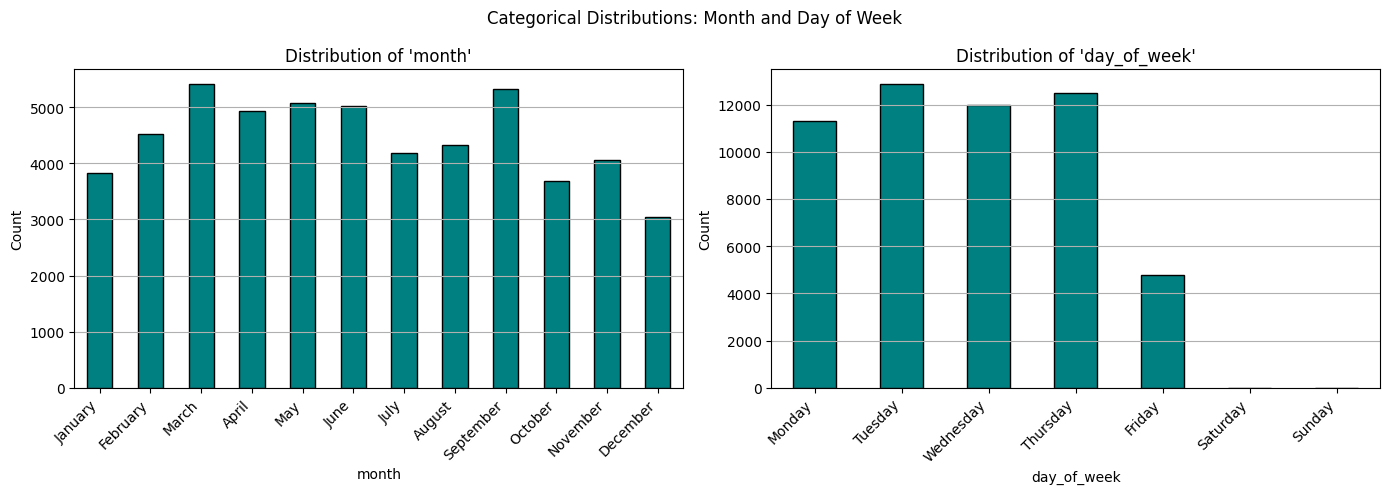

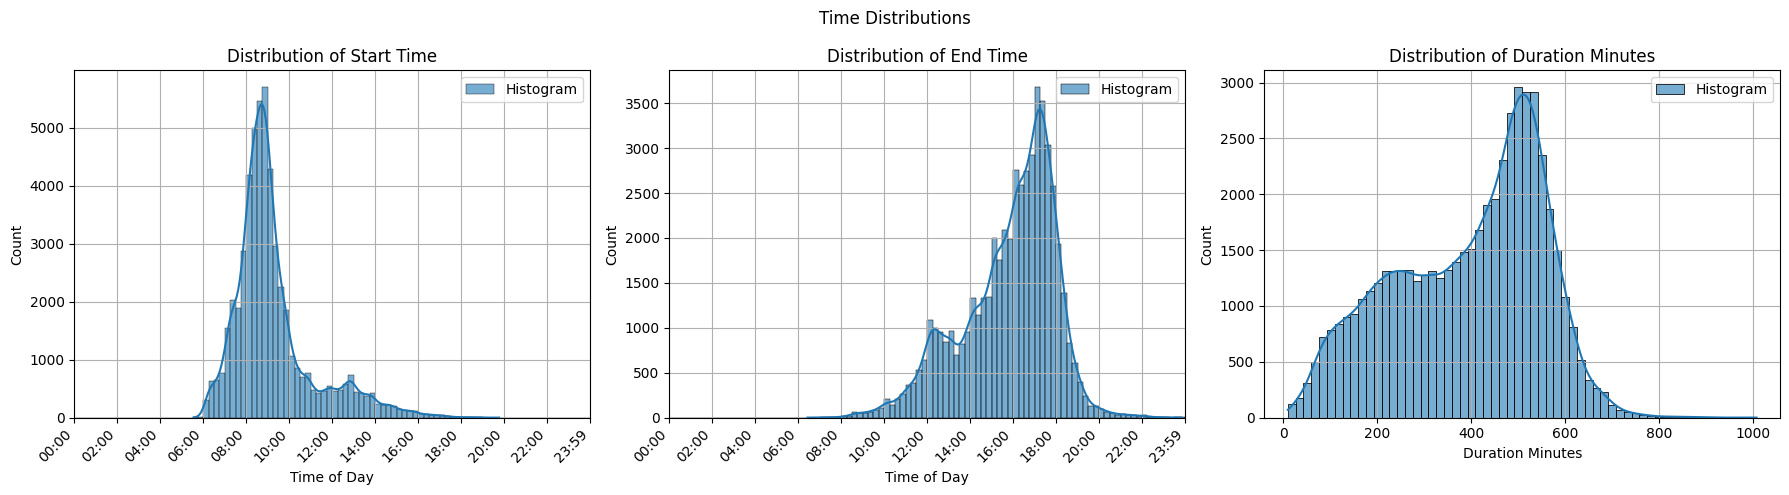

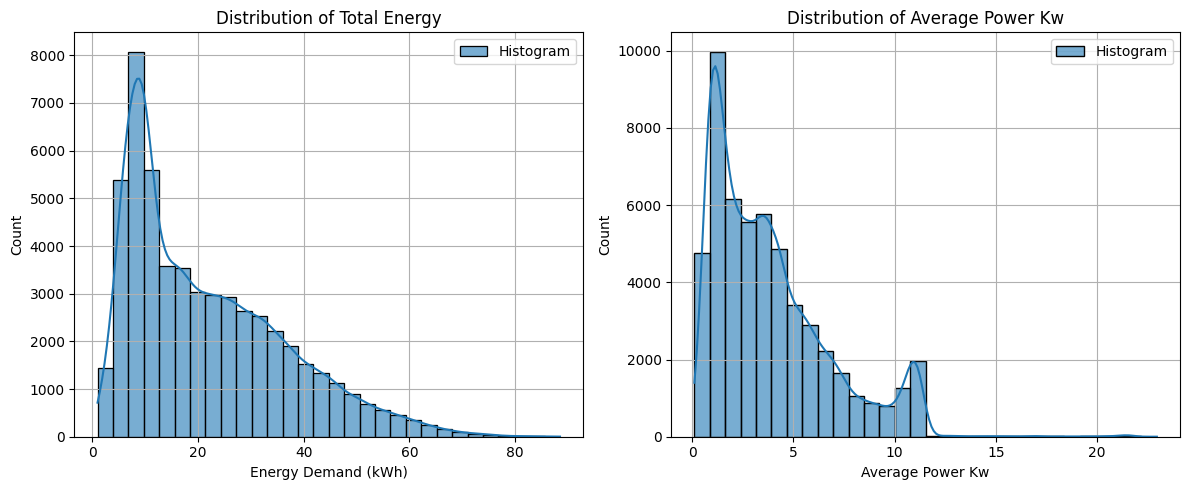

In [81]:
plot_univariate_plots(plotter, df_cleaned)

### Bivariate Analysis

Next, we explore **bivariate relationships** within the dataset to better understand how variables interact with each other.  
This includes visualizations such as **correlation heatmaps**, and **2D histograms** to examine joint distributions of key variables.  

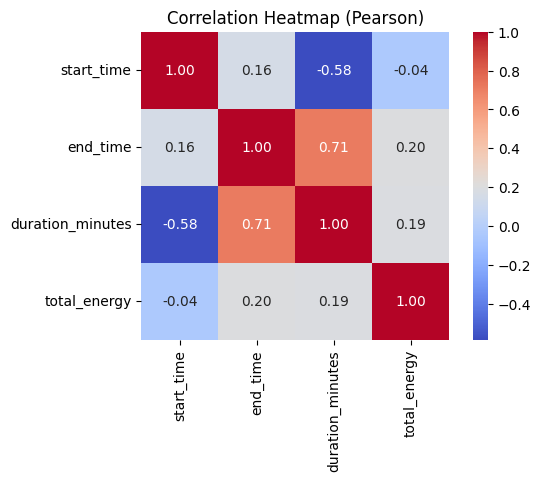

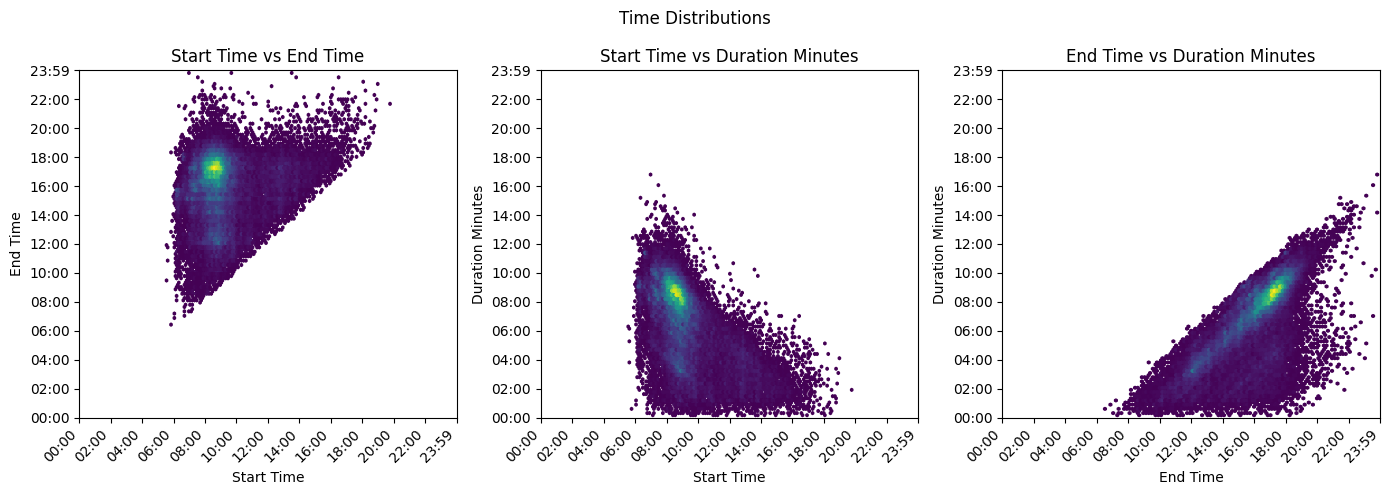

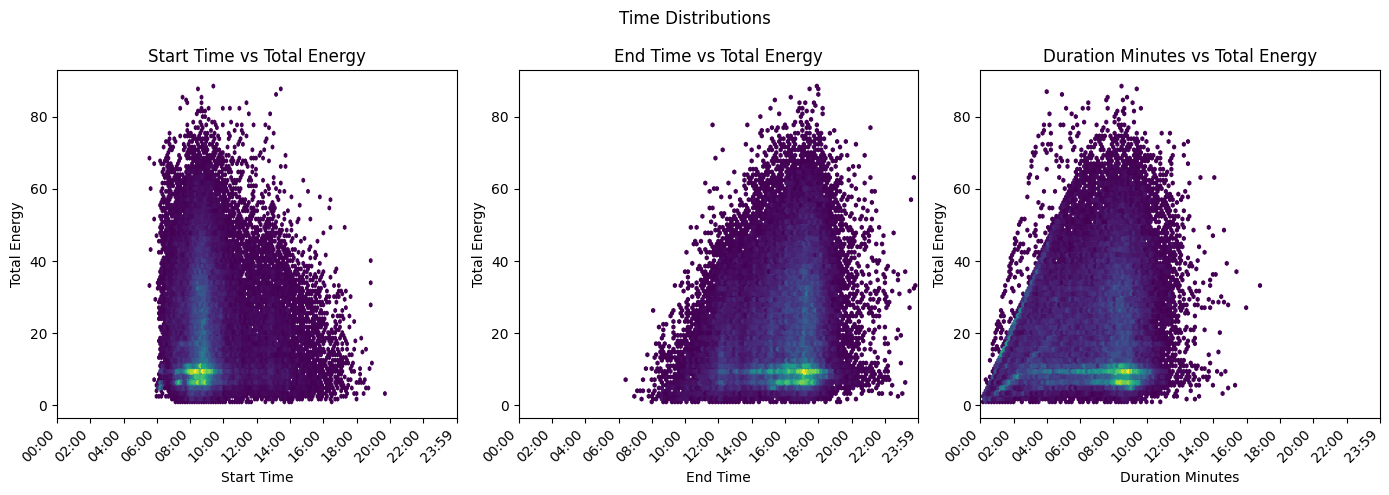

2025-07-31 17:19:08,121 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:19:08,179 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:19:08,406 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:19:08,453 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:19:08,

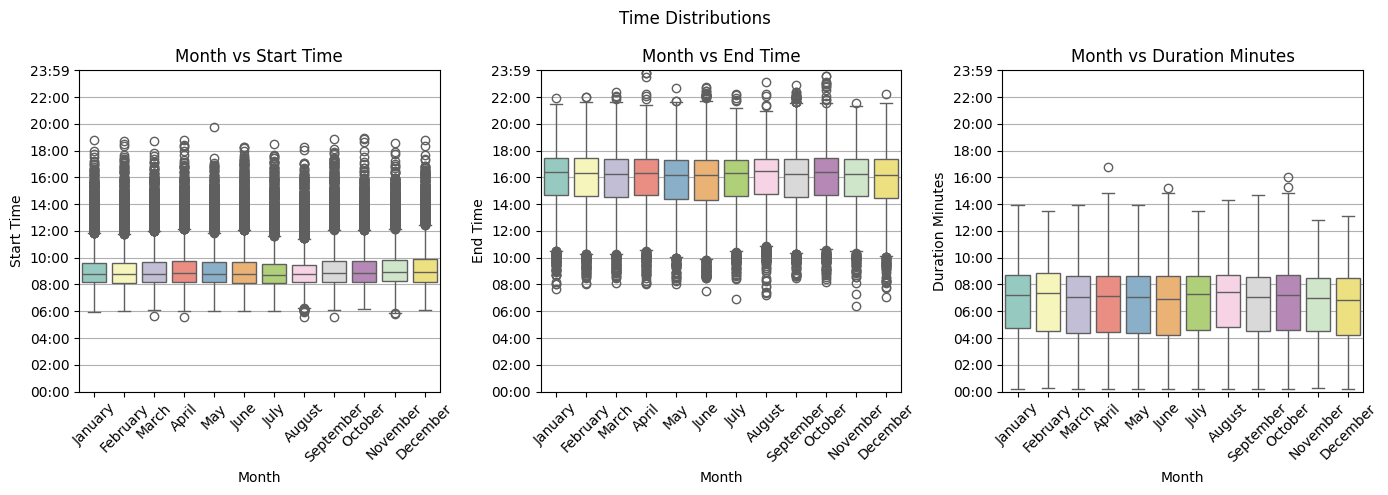

2025-07-31 17:19:09,117 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:19:09,162 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:19:09,276 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:19:09,302 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:19:09,

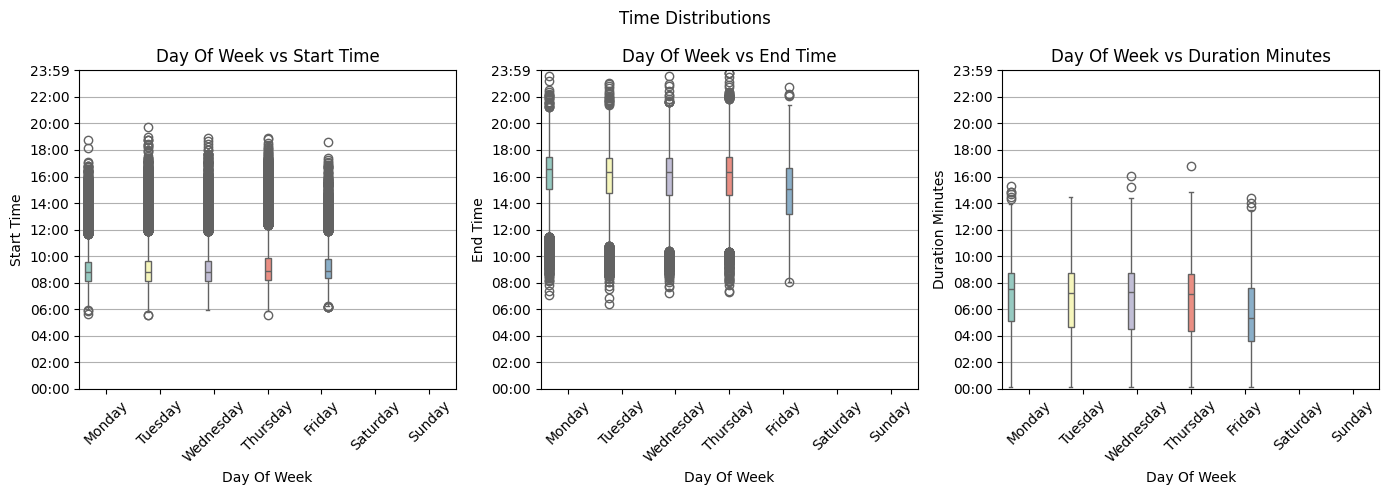

In [82]:
plot_bivariate_plots(plotter, df_cleaned)

2025-07-31 17:16:54,249 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:16:54,257 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:16:54,265 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:16:54,277 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:16:54,

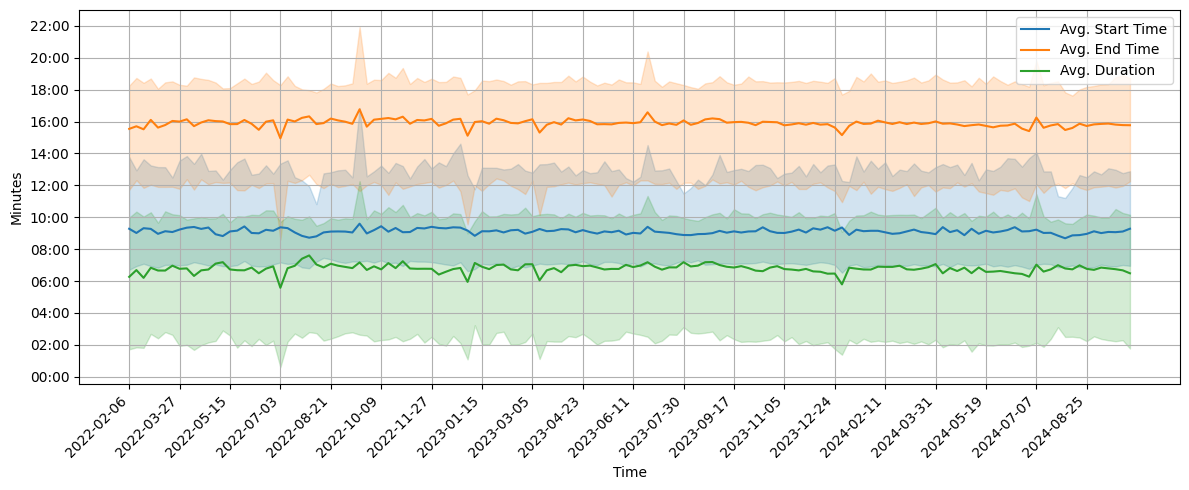

In [72]:
plotter.set_strategy(PlotAverageSessionTimes())
fig = plotter.plot(df_v2, show_duration=True)
plt.show()

In [76]:
df_daily_stats = get_daily_session_stats(df_v2)
display(df_daily_stats.head(5))

,day_of_week,day_of_week_enum,month,num_sessions,avg_duration_minutes,avg_total_energy,avg_start_time,avg_end_time
date,,,,,,,,
2022-02-01,Tuesday,1,February,20,446.060833,26.845950,09:00:45,16:26:57
2022-02-02,Wednesday,2,February,16,393.027083,21.693125,09:02:22.500000,15:35:22.500000
2022-02-03,Thursday,3,February,18,348.540741,25.142500,09:22:26.666666,15:11:06.666666
2022-02-04,Friday,4,February,9,243.324074,23.435222,10:01:40,14:05:13.333333
2022-02-07,Monday,0,February,14,500.552381,27.781500,08:08:51.428571,16:29:21.428571


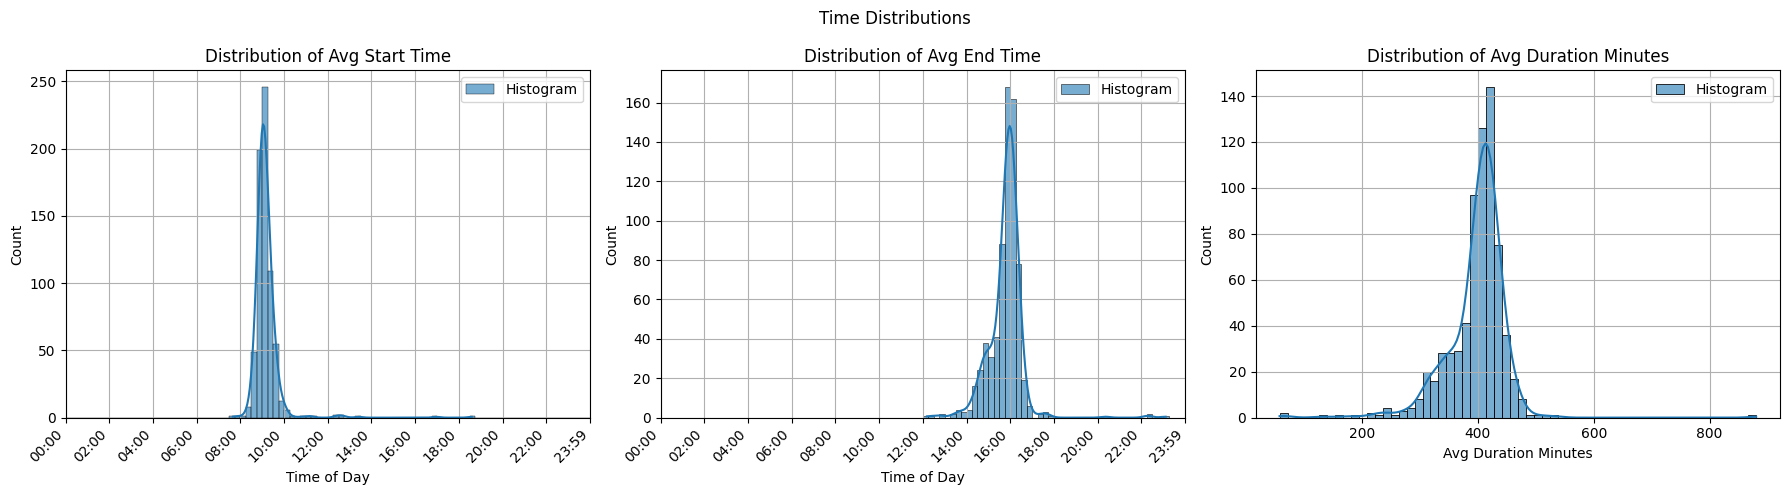

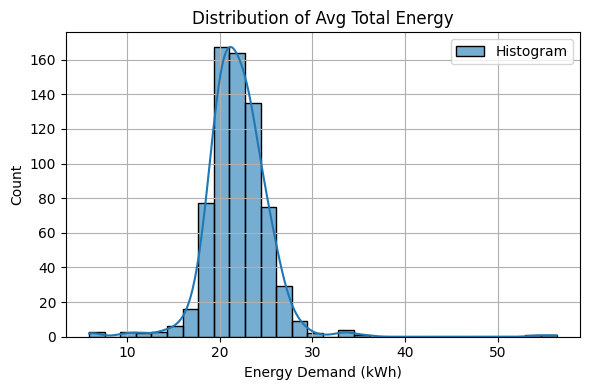

In [77]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plotter.set_strategy(PlotNumericalDistribution(kde=True))
plotter.plot(df_daily_stats, column="avg_start_time", ax=axs[0], time_of_day_settings_flag=True)
plotter.plot(df_daily_stats, column="avg_end_time", ax=axs[1], time_of_day_settings_flag=True)
plotter.plot(df_daily_stats, column="avg_duration_minutes", bins=60, ax=axs[2])

fig.suptitle("Time Distributions")
fig.tight_layout()

fig = plotter.plot(df_daily_stats, column="avg_total_energy")
fig.axes[0].set_xlabel("Energy Demand (kWh)")
plt.show()

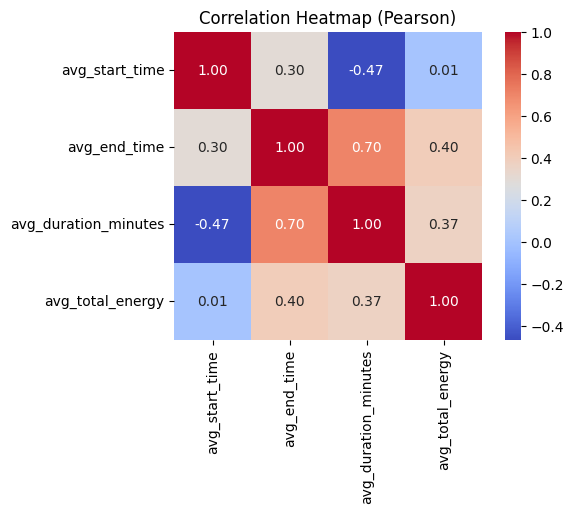

In [78]:
plotter.set_strategy(PlotCorrHeatmap())
plotter.plot(df_daily_stats,features=["avg_start_time", "avg_end_time", "avg_duration_minutes","avg_total_energy"])
plt.show()

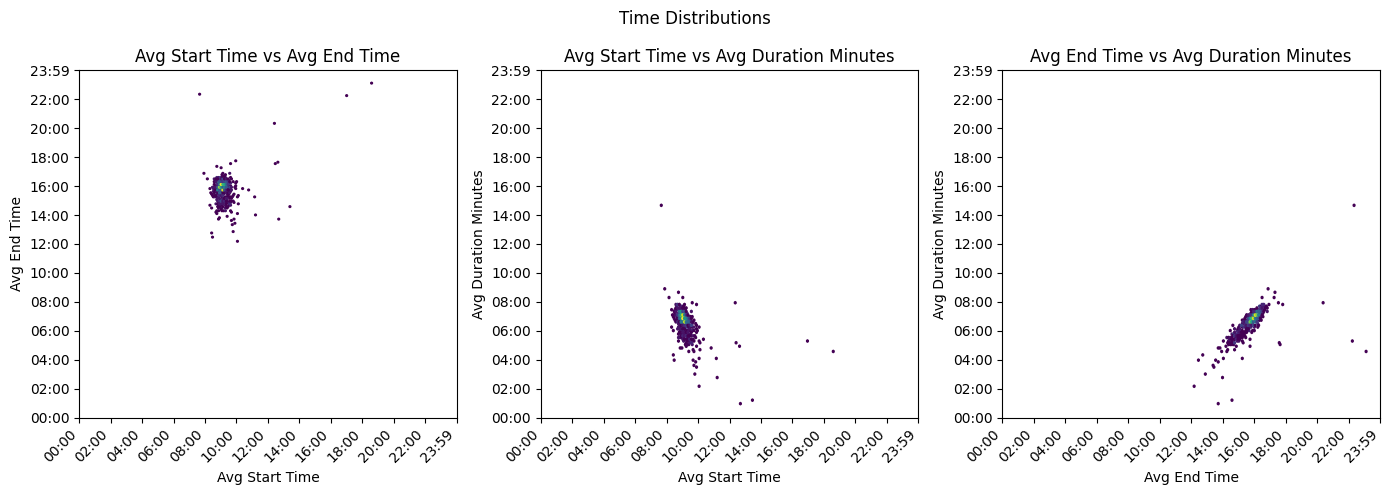

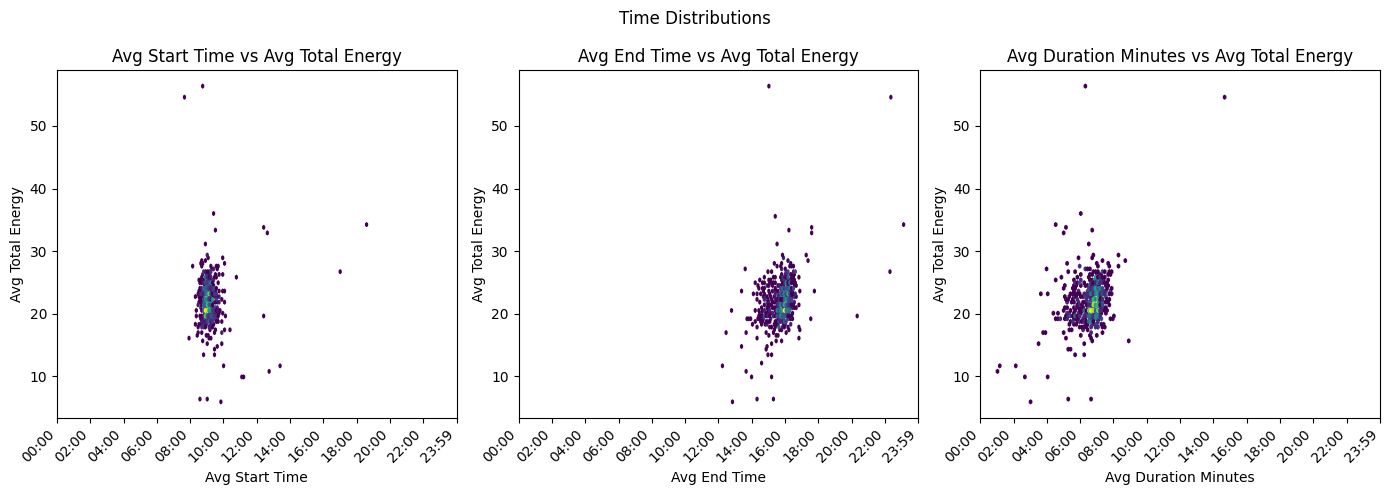

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

plotter.set_strategy(PlotNumericalVsNumericalScatter())
plotter.plot(df_daily_stats, feature1="avg_start_time", feature2="avg_end_time", ax=axs[0], time_of_day_settings_flag = (True, True), gridsize=100)
plotter.plot(df_daily_stats, feature1="avg_start_time", feature2="avg_duration_minutes", ax=axs[1], time_of_day_settings_flag = (True, True), gridsize=100)
plotter.plot(df_daily_stats, feature1="avg_end_time", feature2="avg_duration_minutes", ax=axs[2], time_of_day_settings_flag = (True, True), gridsize=100)

fig.suptitle("Time Distributions")
fig.tight_layout()

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

plotter.set_strategy(PlotNumericalVsNumericalScatter())
plotter.plot(df_daily_stats, feature1="avg_start_time", feature2="avg_total_energy", ax=axs[0], time_of_day_settings_flag = (True, False), gridsize=100)
plotter.plot(df_daily_stats, feature1="avg_end_time", feature2="avg_total_energy", ax=axs[1], time_of_day_settings_flag = (True, False), gridsize=100)
plotter.plot(df_daily_stats, feature1="avg_duration_minutes", feature2="avg_total_energy", ax=axs[2], time_of_day_settings_flag = (True, False), gridsize=100)

fig.suptitle("Time Distributions")
fig.tight_layout()
plt.show()
plt.show()

2025-07-31 17:16:59,783 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:16:59,789 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:16:59,880 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:16:59,884 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:16:59,

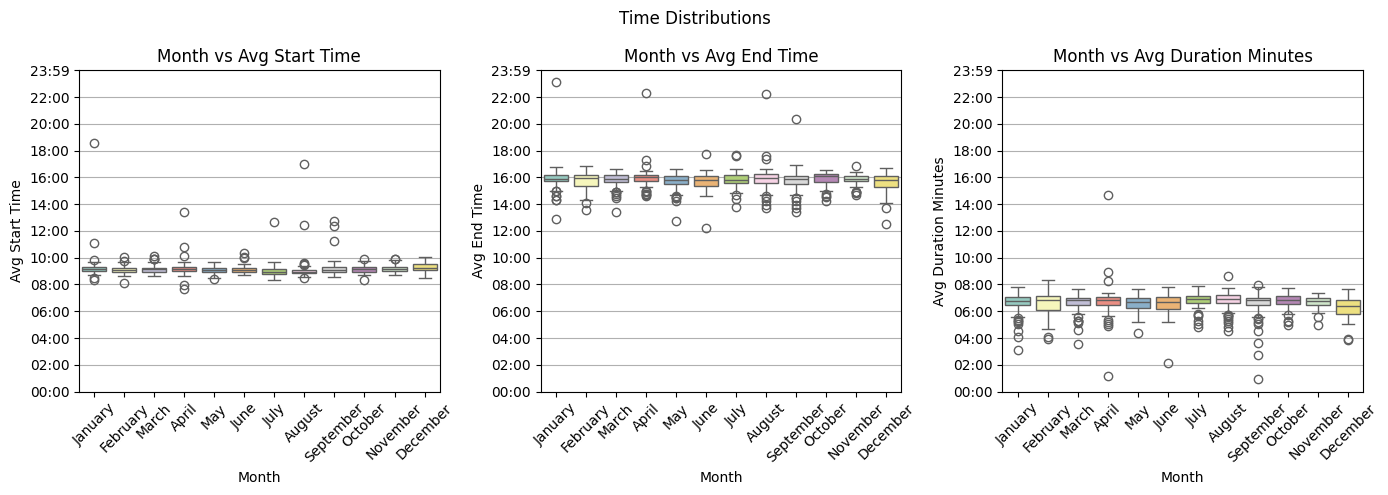

2025-07-31 17:17:00,369 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:17:00,377 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:17:00,575 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:17:00,581 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-31 17:17:00,

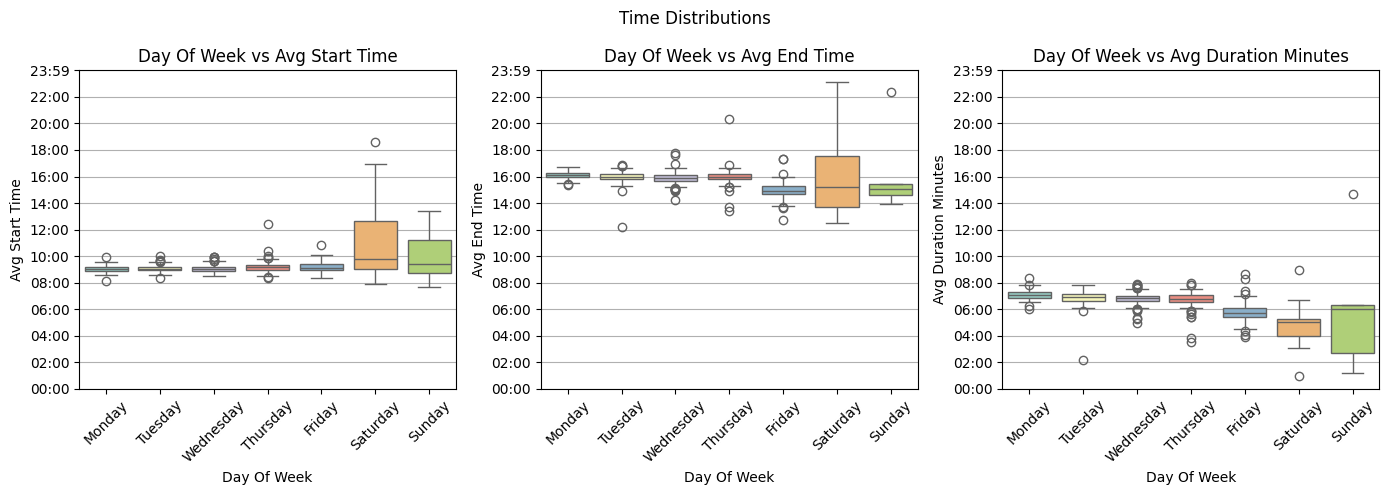

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

plotter.set_strategy(PlotCategoricalVsNumericalBox())
plotter.plot(df_daily_stats, categorical_col="month", numerical_col="avg_start_time", ax=axs[0], time_of_day_settings_flag = True, gridsize=100)
plotter.plot(df_daily_stats, categorical_col="month", numerical_col="avg_end_time", ax=axs[1], time_of_day_settings_flag = True, gridsize=100)
plotter.plot(df_daily_stats, categorical_col="month", numerical_col="avg_duration_minutes", ax=axs[2], time_of_day_settings_flag = True, gridsize=100)

fig.suptitle("Time Distributions")
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

plotter.set_strategy(PlotCategoricalVsNumericalBox())
plotter.plot(df_daily_stats, categorical_col="day_of_week", numerical_col="avg_start_time", ax=axs[0], time_of_day_settings_flag = True, gridsize=100)
plotter.plot(df_daily_stats, categorical_col="day_of_week", numerical_col="avg_end_time", ax=axs[1], time_of_day_settings_flag = True, gridsize=100)
plotter.plot(df_daily_stats, categorical_col="day_of_week", numerical_col="avg_duration_minutes", time_of_day_settings_flag = True, ax=axs[2], gridsize=100)

fig.suptitle("Time Distributions")
fig.tight_layout()
plt.show()